Import Libraries

In [349]:
import csv
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Functions

In [350]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# THIS IS A FUNCITON YOU CAN CALL FROM OTHER PLACES TO GET THE DATA 
def CSV_Read_Lidar_data(data_path):
    rows = []
    with open(data_path, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            rows.append(row)
    return header, rows

Read the CSV File

In [351]:
rows = []
file_path = 'Data/'
file_name = 'Hallway_Lidar_data_dinosars2'
with open(file_path+file_name+'.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print("test")

num_rows = len(rows[2::3])
headers = np.array(header).T


test


Create pd Series and DataFrames

In [352]:
# Create a Series for the header
header_names = ['angle_min', 'angle_max', 'angle_increment', 'time_increment', 'scan_time', 'range_min', 'range_max']
Header_info = pd.DataFrame(headers, header_names).astype(float)
Header_info

,0
angle_min,-3.124139
angle_max,3.141593
angle_increment,0.005807
time_increment,0.000113
scan_time,0.121893
range_min,0.150000
range_max,12.000000


In [353]:
# create a lidar rho dataframe
rho_df = pd.DataFrame(np.array(rows[2::3]))
rho_df = rho_df.T
rho_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2.48799991607666,3.0360000133514404,3.0360000133514404,6.74399995803833,6.800000190734863,6.688000202178955,6.728000164031982,6.728000164031982,2.240000009536743,1.7519999742507935,...,2.1080000400543213,2.1040000915527344,6.76800012588501,6.760000228881836,6.760000228881836,6.728000164031982,6.5279998779296875,6.455999851226807,6.111999988555908,6.519999980926514
1,2.5,3.0360000133514404,3.0320000648498535,6.74399995803833,6.791999816894531,6.631999969482422,6.736000061035156,6.736000061035156,2.2279999256134033,1.74399995803833,...,2.1080000400543213,2.1040000915527344,6.751999855041504,6.760000228881836,6.760000228881836,6.711999893188477,6.5279998779296875,6.455999851226807,6.111999988555908,6.51200008392334
2,2.496000051498413,3.0360000133514404,3.0360000133514404,6.74399995803833,6.791999816894531,6.639999866485596,6.728000164031982,6.736000061035156,2.2200000286102295,1.7339999675750732,...,2.1080000400543213,2.1040000915527344,6.751999855041504,6.711999893188477,6.760000228881836,6.736000061035156,6.5279998779296875,6.455999851226807,6.464000225067139,6.504000186920166
3,2.5,3.0399999618530273,3.0399999618530273,6.751999855041504,6.791999816894531,6.696000099182129,6.728000164031982,6.736000061035156,2.2079999446868896,1.722000002861023,...,2.1080000400543213,2.0999999046325684,6.76800012588501,6.703999996185303,6.760000228881836,6.760000228881836,6.480000019073486,inf,6.480000019073486,6.495999813079834
4,2.5,3.0399999618530273,3.0399999618530273,6.751999855041504,6.800000190734863,6.71999979019165,inf,6.728000164031982,2.200000047683716,1.7120000123977661,...,2.1080000400543213,2.1040000915527344,6.776000022888184,6.74399995803833,6.760000228881836,6.791999816894531,6.495999813079834,6.48799991607666,6.480000019073486,6.48799991607666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2.447999954223633,3.0360000133514404,3.0399999618530273,6.808000087738037,6.783999919891357,6.688000202178955,6.728000164031982,6.711999893188477,2.312000036239624,1.8040000200271606,...,2.1080000400543213,2.1040000915527344,6.800000190734863,6.783999919891357,6.76800012588501,inf,6.544000148773193,6.5279998779296875,6.519999980926514,6.51200008392334
1076,2.4600000381469727,3.0360000133514404,3.0399999618530273,6.791999816894531,6.815999984741211,6.679999828338623,6.728000164031982,6.71999979019165,2.2960000038146973,1.7960000038146973,...,2.1080000400543213,2.1040000915527344,6.791999816894531,6.783999919891357,6.76800012588501,6.776000022888184,6.48799991607666,6.519999980926514,6.51200008392334,6.504000186920166
1077,2.4719998836517334,3.0439999103546143,3.0439999103546143,6.800000190734863,inf,6.71999979019165,6.728000164031982,6.71999979019165,2.2880001068115234,1.781999945640564,...,2.1080000400543213,2.1040000915527344,6.776000022888184,6.783999919891357,6.76800012588501,6.776000022888184,6.480000019073486,6.5279998779296875,6.519999980926514,6.504000186920166
1078,2.4719998836517334,3.0399999618530273,3.0399999618530273,6.783999919891357,inf,6.703999996185303,6.728000164031982,6.71999979019165,2.2760000228881836,1.7699999809265137,...,2.1040000915527344,2.0999999046325684,6.760000228881836,6.776000022888184,6.760000228881836,6.776000022888184,6.48799991607666,6.5279998779296875,6.519999980926514,6.495999813079834


In [354]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

index_tb_poles = []
for i in range(0, rho_df.shape[1]):
    del_indexes = np.array(list(rho_df[i][rho_df[i].astype(float) <= 0.3].index))
    del_indexes = del_indexes + (1080 * i)
    index_tb_poles.append(del_indexes)
# for i in range(num_rows):
#     index_tb_poles.append(del_indexes + (1080 * i))
tb_pole_indexes = flatten_extend(index_tb_poles)
np.array(tb_pole_indexes)

array([   91,    92,    93,    94,    95,    96,    97,   441,   445,
         446,  1171,  1175,  1178,  1520,  1522,  1525,  1526,  2254,
        2255,  2256,  2257,  2604,  2605,  2606,  3336,  3684,  3685,
        4411,  4414,  4418,  4762,  4763,  4764,  4765,  5494,  5495,
        5496,  5837,  5838,  5839,  5841,  5842,  5843,  5844,  5845,
        5846,  6571,  6918,  6919,  6920,  6921,  6922,  6923,  6924,
        6925,  6926,  7651,  7656,  7998,  7999,  8000,  8001,  8002,
        8003,  8004,  8005,  8006,  8731,  8737,  8738,  9084,  9085,
        9086,  9813,  9814, 10894, 10895, 10896, 10897, 11237, 11238,
       11239, 11241, 11242, 11243, 11244, 11245, 11246, 11972, 11973,
       11974, 11975, 11976, 11977, 11978, 12319, 12320, 12321, 12322,
       12323, 12324, 12325, 13051, 13052, 13053, 13054, 13055, 13056,
       13057, 13403, 13405, 14131, 14134, 14135, 14136, 14137, 14481,
       14484, 15212, 15214, 15215, 15216, 15217, 15218, 15564, 15565,
       15566, 16291,

In [355]:
# rho_df = rho_df.transpose().drop(del_indexes, axis=1).transpose()

In [356]:
# create a dataframe of the radian alphas
alpha_df = pd.DataFrame()

for i in range(rho_df.shape[1]):
    # Header_info.loc['angle_increment'][i] * np.arange(1, 1081)
    alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081)
# alpha_df = alpha_df.transpose().drop(del_indexes, axis=1).transpose()
alpha_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,...,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807
1,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,...,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614
2,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,...,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421
3,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,...,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228
4,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,...,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,...,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311
1076,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,...,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118
1077,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,...,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925
1078,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,...,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732


In [357]:
# Get the x and y coodinates of the dataframe (in a new dataframe)
cartesian_df = pd.DataFrame()
dist_between_scans = 0.423 # distance between each lidar scan
index = 0
for i in range(rho_df.shape[1]):
    x, y = pol2cart(rho_df[i].astype(float), alpha_df[i].astype(float))
    y += dist_between_scans * i # corrects the offset between 
    cartesian_df[index] = x
    index += 1 # this is just to make the index numbers up
    cartesian_df[index] = y
    index += 1
cartesian_df

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,2.487958,0.014448,3.035949,0.440630,3.035949,0.863630,6.743886,1.308162,6.799886,1.731487,...,6.727887,11.037069,6.527890,11.458908,6.455891,11.881490,6.111897,12.302492,6.519890,12.727861
1,2.499831,0.029034,3.035795,0.458259,3.031796,0.881213,6.743545,1.347323,6.791542,1.770880,...,6.711547,11.075951,6.527560,11.496814,6.455564,11.918978,6.111588,12.337983,6.511561,12.765628
2,2.495621,0.043480,3.035539,0.475887,3.035539,0.898887,6.742977,1.386481,6.790969,1.810317,...,6.734978,11.115342,6.527009,11.534718,6.455020,11.956464,6.463019,12.379603,6.503013,12.803300
3,2.499326,0.058065,3.039180,0.493607,3.039180,0.916607,6.750178,1.425821,6.790168,1.849750,...,6.758177,11.155007,6.478252,11.571503,inf,inf,6.478252,12.417503,6.494247,12.840875
4,2.498946,0.072577,3.038719,0.511254,3.038719,0.934254,6.749154,1.465016,6.797134,1.889410,...,6.789137,11.195177,6.493262,11.609584,6.485265,12.032352,6.477269,12.455120,6.485265,12.878352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2.446511,-0.085356,3.034154,0.317142,3.038151,0.740003,6.803860,1.031622,6.779875,1.455459,...,inf,-inf,6.540021,11.192827,6.524030,11.616385,6.516035,12.039664,6.508040,12.462942
1076,2.458961,-0.071496,3.034718,0.334763,3.038716,0.757647,6.789131,1.071600,6.813121,1.493903,...,6.773138,10.801065,6.485259,11.232436,6.517246,11.654506,6.509249,12.077738,6.501253,12.500971
1077,2.471331,-0.057495,3.043176,0.352201,3.043176,0.775201,6.798161,1.110842,inf,-inf,...,6.774167,10.840400,6.478247,11.270284,6.526234,11.692168,6.518236,12.115354,6.502241,12.538726
1078,2.471623,-0.043143,3.039537,0.369943,3.039537,0.792943,6.782967,1.150600,inf,-inf,...,6.774968,10.879740,6.487012,11.307766,6.527006,11.730068,6.519007,12.153208,6.495010,12.576627


In [358]:
# Combine in to 1 value
all_cart_datax = pd.DataFrame()
all_cart_datay = pd.DataFrame()

for i in range(int(len(cartesian_df.columns)/2)):
    # combine all x values
    all_cart_datax = pd.concat([all_cart_datax, cartesian_df[i*2]])
    all_cart_datax = all_cart_datax.reset_index()[0]

for i in range(1, int(len(cartesian_df.columns)), 2):   
    # combine all y values
    all_cart_datay = pd.concat([all_cart_datay, cartesian_df[i]])
    all_cart_datay = all_cart_datay.reset_index()[0]

all_cart_data = pd.DataFrame([all_cart_datax, all_cart_datay], ['X', 'Y'])
all_cart_data

,0,1,2,3,4,5,6,7,8,9,...,33470,33471,33472,33473,33474,33475,33476,33477,33478,33479
X,2.487958,2.499831,2.495621,2.499326,2.498946,2.514473,2.525912,2.529268,2.508570,2.479813,...,6.530640,6.532957,6.527064,6.536930,6.522599,6.508040,6.501253,6.502241,6.495010,6.503559
Y,0.014448,0.029034,0.043480,0.058065,0.072577,0.087644,0.102732,0.117584,0.131224,0.144164,...,12.272061,12.309991,12.348352,12.385888,12.424504,12.462942,12.500971,12.538726,12.576627,12.614252


In [359]:
# Now convert that back to alpha and rho
alpha_rho_df = pd.DataFrame(cart2pol(all_cart_data.loc['X'], all_cart_data.loc['Y']), ['Rho', 'Alpha'])
alpha_rho_df

,0,1,2,3,4,5,6,7,8,9,...,33470,33471,33472,33473,33474,33475,33476,33477,33478,33479
Rho,2.488000,2.500000,2.496000,2.500000,2.500000,2.516000,2.528000,2.532000,2.512000,2.48400,...,13.901537,13.936119,13.967261,14.005059,14.032555,14.059855,14.090442,14.124404,14.154741,14.192097
Alpha,0.005807,0.011614,0.017421,0.023228,0.029035,0.034842,0.040649,0.046456,0.052263,0.05807,...,1.081757,1.082889,1.084549,1.085178,1.087366,1.089554,1.091230,1.092401,1.094087,1.094769


In [366]:
#Finally combine the xy data and alpha rho data
all_data_df = pd.concat([alpha_rho_df, all_cart_data])
all_data_df = all_data_df.drop(tb_pole_indexes, axis=1)
all_data_df = all_data_df.T.iloc[::6, :].T

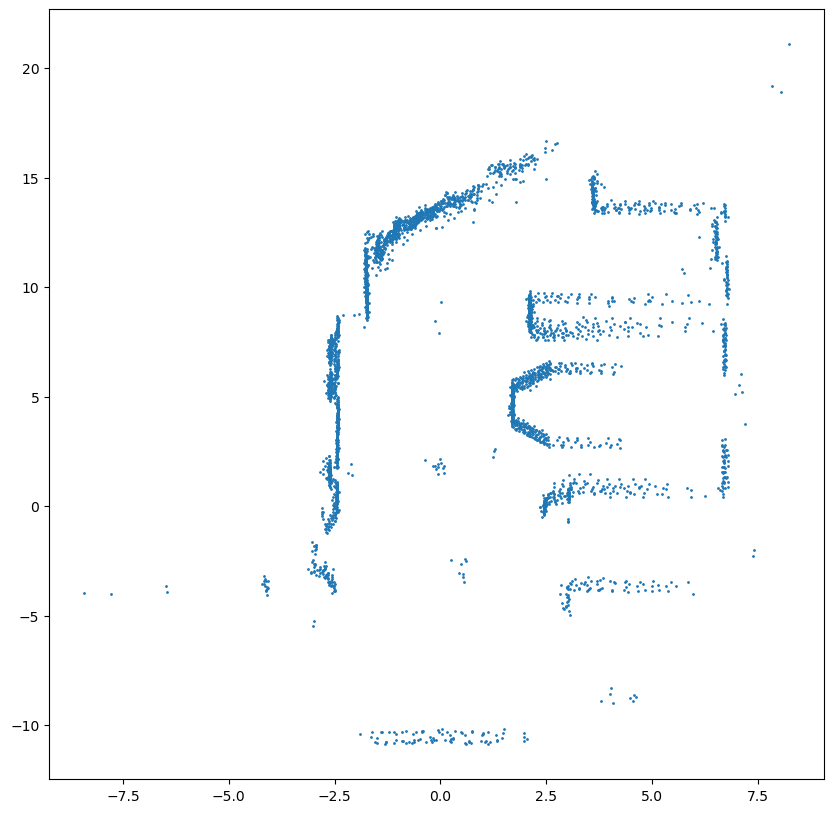

In [367]:
plt.figure(figsize=(10, 10))
plt.scatter(all_data_df.loc['X'], all_data_df.loc['Y'], s=1)
plt.show()


In [368]:
# write to csv
addition = '_GT'
with open(file_path + file_name + addition + '.csv', 'w', newline='') as file:
  writer = csv.writer(file)

  writer.writerow(all_data_df.loc['Rho'])
  writer.writerow(all_data_df.loc['Alpha'])
  writer.writerow(all_data_df.loc['X'])
  writer.writerow(all_data_df.loc['Y'])